In [1]:
from sqlalchemy import create_engine

In [3]:
connection = engine.connect()

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
query = """
        SELECT
            *
        FROM 
            salaries
        Limit 10;
        """
data = engine.execute(query)

for record in data:
    print(record)

(10001, 60117, datetime.datetime(2022, 2, 24, 14, 9, 2, 260054))
(10002, 65828, datetime.datetime(2022, 2, 24, 14, 9, 2, 260054))
(10003, 40006, datetime.datetime(2022, 2, 24, 14, 9, 2, 260054))
(10004, 40054, datetime.datetime(2022, 2, 24, 14, 9, 2, 260054))
(10005, 78228, datetime.datetime(2022, 2, 24, 14, 9, 2, 260054))
(10006, 40000, datetime.datetime(2022, 2, 24, 14, 9, 2, 260054))
(10007, 56724, datetime.datetime(2022, 2, 24, 14, 9, 2, 260054))
(10008, 46671, datetime.datetime(2022, 2, 24, 14, 9, 2, 260054))
(10009, 60929, datetime.datetime(2022, 2, 24, 14, 9, 2, 260054))
(10010, 72488, datetime.datetime(2022, 2, 24, 14, 9, 2, 260054))


In [12]:
df = pd.read_sql(query, engine)

In [14]:
df

,emp_no,salary,last_updated
0,10001,60117,2022-02-24 14:09:02.260054
1,10002,65828,2022-02-24 14:09:02.260054
2,10003,40006,2022-02-24 14:09:02.260054
3,10004,40054,2022-02-24 14:09:02.260054
4,10005,78228,2022-02-24 14:09:02.260054
5,10006,40000,2022-02-24 14:09:02.260054
6,10007,56724,2022-02-24 14:09:02.260054
7,10008,46671,2022-02-24 14:09:02.260054
8,10009,60929,2022-02-24 14:09:02.260054
9,10010,72488,2022-02-24 14:09:02.260054


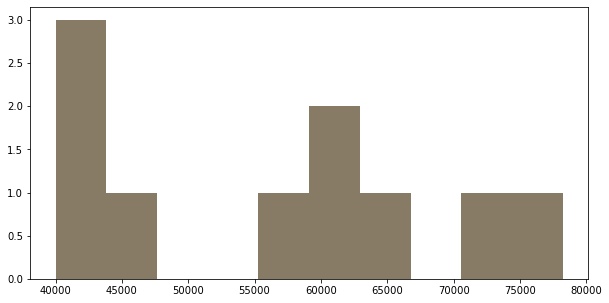

In [23]:
##This get the bar plot
plt.figure(figsize=(10,5))
plt.hist(df.salary, color = "#877B66")
plt.xlabel = ("Salaries of Employees")
plt.ylabel = ("Frequency")
plt.title = ("Histogram of Employees' Salaries")
plt.show()

In [29]:
query = """
        SELECT
            avg(s.salary), t.title
        FROM 
            salaries s
        join employees e on s.emp_no = e.emp_no
        join titles t on e.emp_title_id = t.title_id
        group by t.title
        Limit 10;
        """
data = engine.execute(query)

for record in data:
    print(record)

(Decimal('48564.434447300771'), 'Assistant Engineer')
(Decimal('48535.336511426337'), 'Engineer')
(Decimal('51531.041666666667'), 'Manager')
(Decimal('48506.799871095788'), 'Senior Engineer')
(Decimal('58550.172704359929'), 'Senior Staff')
(Decimal('58465.382850331521'), 'Staff')
(Decimal('48582.896091893319'), 'Technique Leader')


In [30]:
df = pd.read_sql(query, engine)
df

,avg,title
0,48564.434447,Assistant Engineer
1,48535.336511,Engineer
2,51531.041667,Manager
3,48506.799871,Senior Engineer
4,58550.172704,Senior Staff
5,58465.382850,Staff
6,48582.896092,Technique Leader


<Figure size 1080x720 with 0 Axes>

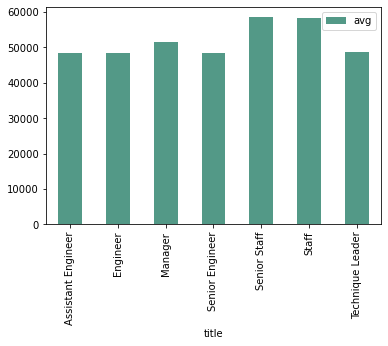

In [35]:
##This get the bar plot

plt.figure(figsize=(15,10))
df.plot(x='title',y='avg',kind='bar', color="#539987")
plt_xlabel = ("Title of Employees")
plt.ylabel = ("Average Salaries")
plt.title = ("Average Salaries of Employees by Title")
plt.show()

In [36]:
connection.close()
engine.dispose()